In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [ ]:
dataset_path = '/content/drive/MyDrive/ML_projects/Dataset_BUSI_with_GT/'


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
feature_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 1589 images belonging to 3 classes.


In [ ]:
features = base_model.predict(feature_generator, steps=len(feature_generator), verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 450s 9s/step


In [ ]:
np.save('extracted_features.npy', features)

In [ ]:
labels = feature_generator.classes
class_labels = list(feature_generator.class_indices.keys())


features_df = pd.DataFrame(features.reshape(features.shape[0], -1))  # Flatten features
features_df['Label'] = [class_labels[label] for label in labels]

In [ ]:
print("Extracted Features:")
print(features_df.head())

Extracted Features:
          0    1         2         3         4    5    6    7    8    9  ...  \
0  0.000000  0.0  0.088935  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
1  0.126278  0.0  0.000000  0.089462  0.283713  0.0  0.0  0.0  0.0  0.0  ...   
2  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
3  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
4  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...   

       8183      8184  8185  8186      8187  8188      8189      8190  8191  \
0  0.000000  0.547907   0.0   0.0  0.235508   0.0  0.076285  0.611717   0.0   
1  0.121355  0.268706   0.0   0.0  0.294696   0.0  0.000000  0.684258   0.0   
2  0.000000  0.592814   0.0   0.0  0.057959   0.0  0.346077  0.917353   0.0   
3  0.120868  0.263831   0.0   0.0  0.307130   0.0  0.000000  0.697172   0.0   
4  0.039132  0.786192   0.0   0.0  0.493474   0.0  0.000000  0.574159   0.0   

    Label  
0  benign  


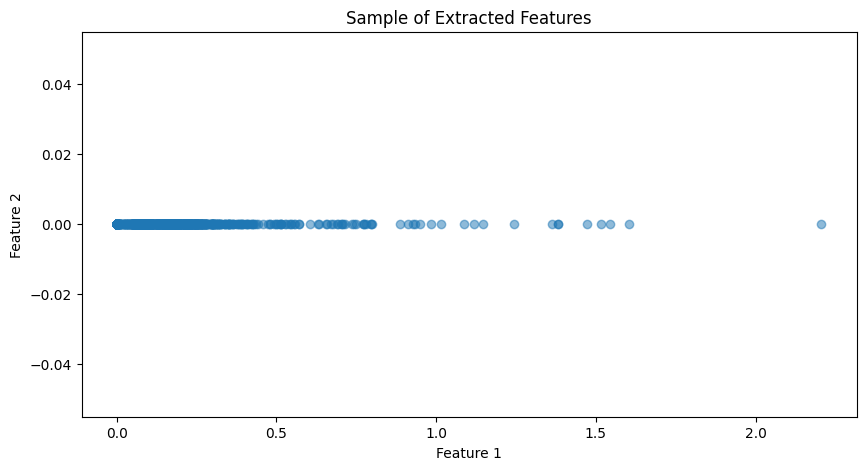

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(features_df.iloc[:, 0], features_df.iloc[:, 1], alpha=0.5)
plt.title('Sample of Extracted Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
benign_features = features_df[features_df['Label'] == 'benign'].iloc[:, :5]  # First 5 features
malignant_features = features_df[features_df['Label'] == 'malignant'].iloc[:, :5]
normal_features = features_df[features_df['Label'] == 'normal'].iloc[:, :5]

In [ ]:
print("Benign Features:")
print(benign_features)

print("\nMalignant Features:")
print(malignant_features)

print("\nNormal Features:")
print(normal_features)

Benign Features:
            0    1         2         3         4
0    0.000000  0.0  0.088935  0.000000  0.000000
1    0.126278  0.0  0.000000  0.089462  0.283713
2    0.000000  0.0  0.000000  0.000000  0.000000
3    0.000000  0.0  0.000000  0.000000  0.000000
4    0.000000  0.0  0.000000  0.000000  0.000000
..        ...  ...       ...       ...       ...
897  0.352529  0.0  0.000000  0.000000  0.000000
898  0.074249  0.0  0.000000  0.058400  0.291756
899  0.427402  0.0  0.000000  0.000000  0.194459
900  0.000000  0.0  0.000000  0.000000  0.000000
901  0.155115  0.0  0.000000  0.112357  0.263048

[902 rows x 5 columns]

Malignant Features:
             0    1         2         3         4
902   0.000000  0.0  0.000000  0.000000  0.000000
903   0.388805  0.0  0.000000  0.378302  0.288864
904   0.000000  0.0  0.000000  0.000000  0.000000
905   0.311734  0.0  0.000000  0.154877  0.256579
906   0.000000  0.0  0.000000  0.000000  0.000000
...        ...  ...       ...       ...       ...


In [ ]:
features_df.to_csv('extracted_features.csv', index=False)

In [ ]:
print(features.shape)

(1589, 4, 4, 512)


In [ ]:
print(features_df.shape)

(1589, 8193)


In [ ]:
print(features_df.shape)
num_features = features_df.shape[1] - 1


feature_columns = [f'Feature_{i+1}' for i in range(num_features)]


features_df.columns = feature_columns + ['Label']


print("Features DataFrame:")
print(features_df.head())

(1589, 8193)
Features DataFrame:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.000000        0.0   0.088935   0.000000   0.000000        0.0   
1   0.126278        0.0   0.000000   0.089462   0.283713        0.0   
2   0.000000        0.0   0.000000   0.000000   0.000000        0.0   
3   0.000000        0.0   0.000000   0.000000   0.000000        0.0   
4   0.000000        0.0   0.000000   0.000000   0.000000        0.0   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_8184  \
0        0.0        0.0        0.0         0.0  ...      0.000000   
1        0.0        0.0        0.0         0.0  ...      0.121355   
2        0.0        0.0        0.0         0.0  ...      0.000000   
3        0.0        0.0        0.0         0.0  ...      0.120868   
4        0.0        0.0        0.0         0.0  ...      0.039132   

   Feature_8185  Feature_8186  Feature_8187  Feature_8188  Feature_8189  \
0      0.547907           0.0           0.0      0

In [ ]:
features_df.to_csv('extracted_features.csv', index=False)

print("Features saved to 'extracted_features.csv'.")

Features saved to 'extracted_features.csv'.


In [ ]:
benign_features = features_df[features_df['Label'] == 'benign'].iloc[:, :5]  # First 5 features
malignant_features = features_df[features_df['Label'] == 'malignant'].iloc[:, :5]
normal_features = features_df[features_df['Label'] == 'normal'].iloc[:, :5]

In [ ]:
print("Benign Features:")
print(benign_features)

print("\nMalignant Features:")
print(malignant_features)

print("\nNormal Features:")
print(normal_features)

Benign Features:
     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0     0.000000        0.0   0.088935   0.000000   0.000000
1     0.126278        0.0   0.000000   0.089462   0.283713
2     0.000000        0.0   0.000000   0.000000   0.000000
3     0.000000        0.0   0.000000   0.000000   0.000000
4     0.000000        0.0   0.000000   0.000000   0.000000
..         ...        ...        ...        ...        ...
897   0.352529        0.0   0.000000   0.000000   0.000000
898   0.074249        0.0   0.000000   0.058400   0.291756
899   0.427402        0.0   0.000000   0.000000   0.194459
900   0.000000        0.0   0.000000   0.000000   0.000000
901   0.155115        0.0   0.000000   0.112357   0.263048

[902 rows x 5 columns]

Malignant Features:
      Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
902    0.000000        0.0   0.000000   0.000000   0.000000
903    0.388805        0.0   0.000000   0.378302   0.288864
904    0.000000        0.0   0.000000   0.000000  

In [ ]:
import pandas as pd


features_df = pd.read_csv('extracted_features.csv')
print(features_df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.000000        0.0   0.088935   0.000000   0.000000        0.0   
1   0.126278        0.0   0.000000   0.089462   0.283713        0.0   
2   0.000000        0.0   0.000000   0.000000   0.000000        0.0   
3   0.000000        0.0   0.000000   0.000000   0.000000        0.0   
4   0.000000        0.0   0.000000   0.000000   0.000000        0.0   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_8184  \
0        0.0        0.0        0.0         0.0  ...      0.000000   
1        0.0        0.0        0.0         0.0  ...      0.121355   
2        0.0        0.0        0.0         0.0  ...      0.000000   
3        0.0        0.0        0.0         0.0  ...      0.120868   
4        0.0        0.0        0.0         0.0  ...      0.039132   

   Feature_8185  Feature_8186  Feature_8187  Feature_8188  Feature_8189  \
0      0.547907           0.0           0.0      0.235508           0.0   
1      0

In [ ]:
X = features_df.iloc[:, :-1].values
y = features_df['Label'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)   # converts string labels to 0,1
print(y_encoded[:10])


[0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class mapping:", class_mapping)

Class mapping: {'benign': 0, 'malignant': 1, 'normal': 2}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
}


In [ ]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies[name] = accuracy  # Store accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.88
Random Forest Accuracy: 0.88
SVM Accuracy: 0.84
KNN Accuracy: 0.84


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = features_df.iloc[:, :-1]
y = features_df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
random_forest_model = RandomForestClassifier()

In [ ]:
stacking_model = StackingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('random_forest', random_forest_model)
    ],
    final_estimator=LogisticRegression()  # Meta-model
)

In [ ]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('logistic', LogisticRegression(max_iter=1000)),
                               ('random_forest', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_stack = stacking_model.predict(X_test)

In [ ]:
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Stacking Ensemble Accuracy: {accuracy_stack:.2f}')

Stacking Ensemble Accuracy: 0.88


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)

model_names = ['Logistic Regression', 'Random Forest', 'Stacking Ensemble']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_stack]

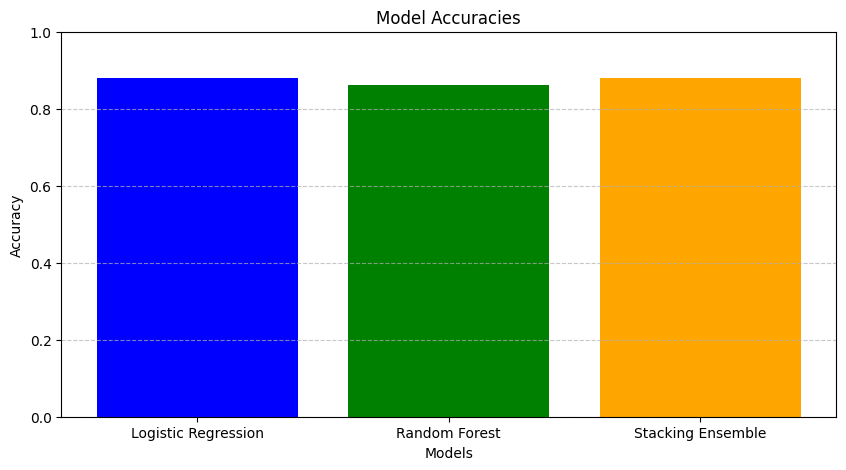

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()